# Tugas Akhir - Pertemuan 5 (CRISP-DM)

Nama : Margareta Lola Lali Lulita

Kelas : 4IA02

NPM : 50421776

___

## Business Understanding 
____

Rincian sumber dataset:

Sumber: Kaggle (Open Datasource) - Global Finance Dataset

Link Akses: https://www.kaggle.com/datasets/mostafaelhabashy/global-finance-dataset




Dalam dataset ini akan diolah untuk mengetahui credit score yang baik dari para customer. Acuan dalam dataset ini adalah untuk menemukan pola pengelompokan untuk kategori orang yang memiliki credit score yang baik dengan variable pendukung seperti umur, pendapatan bulanan, frekuensi dari delay pembayaran, dan lainnya hingga pada kebiasaan customer dalam pembayaran.

___

## Data Understanding

Data yang akan diolah ini memiliki dimensi sebanyak 30395 baris dan 28 kolom. Berikut informasi terkait variable kolom yang tersedia dalam dataset ini:

1. ID: Unique Identification
2. Customer_ID: Unique ID untuk customer
3. Month: Bulan dalam tahun
4. Name: Nama customer
5. Age: Usia Customer
6. SSN: Nomor jaminan sosial customer
7. Occupation: Perkerjaan Customer
8. Annual_Income: jumlah pendapatan tahunan customer
9. Monthly_Inhand_Salary: jumlah pendapatan customer setiap bulan
10. Num_Bank_Accounts: jumlah rekening bank yang dimiliki customer
11. Num_Credit_Card: jumlah kartu kredit yang dimiliki customer
12. Interest_Rate: suku bunga dalam kartu kredit
13. Num_of_Loan: jumlah pinjaman yang diambil dari bank
14. Type_of_Loan: tipe pinjaman (kategorikal)
15. Delay_from_due_date: rata-rata jumlah hari keterlambatan dari tanggal jatuh tempo pembayaran
16. Num_of_Delayed_Payment: rata-rata dari jumlah keterlambatan dalam pembayaran 
17. Changed_Credit_Limit: persentase perubahan batas kredit pada kartu kredit
18. Num_Credit_Inquiries: jumlah permintaan kartu kredit yang diajukan
19. Credit_Mix: klasifikasi campuran kartu kredit (kategorikal)
21. Outstanding_Debt: sisa utang yang harus dibayar (USD)
22. Credit_Utilization_Ratio: rasio penggunaan kredit kartu
23. Credit_History_Age: umur history kredit customer
24. Payment_of_Min_Amount: cek kondisi apakah customer hanya membayarkan jumlah minimum (Kategorikal)
25. Total_EMI_per_month: Pembayaran EMI Bulanan (USD)
26. Amount_invested_: Investasi bulanan customer (USD)
27. Payment_Behaviour: Behaviour pelanggan dalam pembayaran (USD)
28. Monthly_Balance: jumlah saldo bulanan pelanggan (USD)
29. Credit_Score: kategori credit score (Poor, Standard, Good) 

Dalam proses ini akan dilakukan data understanding dengan melihat ukuran data, jumlah null, dan tipe data dari setiap variable penyusun.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [2]:
df.shape

(30395, 28)

In [3]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [4]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,25845.000000,30395.000000,30395.000000,30395.000000,30395.000000,29801.000000,30394.000000,30394.000000
mean,4268.601866,16.550354,23.448561,67.623622,20.968778,26.312909,32.313822,1427.064805
std,3208.350905,114.559221,132.634352,444.086863,14.646614,183.818213,5.142806,8416.025173
min,333.596667,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1660.405417,3.000000,4.000000,7.000000,10.000000,3.000000,28.037906,30.447777
50%,3156.119167,6.000000,6.000000,13.000000,18.000000,6.000000,32.334880,69.602920
75%,6078.743333,8.000000,7.000000,20.000000,28.000000,9.000000,36.564145,165.488777
max,14866.446667,1798.000000,1499.000000,5788.000000,67.000000,2594.000000,50.000000,82256.000000


In [4]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        3045
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       4550
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3464
Delay_from_due_date            0
Num_of_Delayed_Payment      2149
Changed_Credit_Limit           0
Num_Credit_Inquiries         594
Credit_Mix                     1
Outstanding_Debt               1
Credit_Utilization_Ratio       1
Credit_History_Age          2804
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly     1349
Payment_Behaviour              1
Monthly_Balance              401
Credit_Score                   1
dtype: int64

In [5]:
missing_data = (df.select_dtypes(exclude='object').isnull().sum() / df.shape[0] * 100)
missing_data

Monthly_Inhand_Salary       14.969567
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Delay_from_due_date          0.000000
Num_Credit_Inquiries         1.954269
Credit_Utilization_Ratio     0.003290
Total_EMI_per_month          0.003290
dtype: float64

## Data Preparation

Dalam proses data preparation akan dilakukan persiapan dalam data dengan memperbaiki nilai null yang ada menggunakan imputasi, handling outlier, hingga melakukan scaling data untuk normalisasi value dari dataset.

### Imputasi nilai null dengan KNN (Non Object Value)

In [6]:
from sklearn.impute import KNNImputer

In [7]:
imputer = KNNImputer(n_neighbors=2)

In [8]:
numeric_cols = df.select_dtypes(exclude='object')
imputed_data = imputer.fit_transform(numeric_cols)
df.loc[:, numeric_cols.columns] = imputed_data

In [9]:
df.select_dtypes(exclude='object').isnull().any()

Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Delay_from_due_date         False
Num_Credit_Inquiries        False
Credit_Utilization_Ratio    False
Total_EMI_per_month         False
dtype: bool

### Imputasi nilai null (Categorical Value)

In [10]:
categorical_cols = df[['Credit_Score', 'Payment_of_Min_Amount', 'Credit_Mix']]
for col in categorical_cols:
    existing_values = df[col].dropna().unique()
    print(f"Unique values in '{col}': {existing_values}")

Unique values in 'Credit_Score': ['Good' 'Standard' 'Poor']
Unique values in 'Payment_of_Min_Amount': ['No' 'NM' 'Yes']
Unique values in 'Credit_Mix': ['_' 'Good' 'Standard' 'Bad']


In [11]:
import numpy as np
for col in categorical_cols:
    na_indices = df.index[df[col].isna()]
    random_samples = np.random.choice(existing_values, size=len(na_indices))
    for idx, value in zip(na_indices, random_samples):
        df.loc[idx, col] = value

In [12]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        3045
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3464
Delay_from_due_date            0
Num_of_Delayed_Payment      2149
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               1
Credit_Utilization_Ratio       0
Credit_History_Age          2804
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1349
Payment_Behaviour              1
Monthly_Balance              401
Credit_Score                   0
dtype: int64

In [13]:
categorical_cols2 = df[[
    'Monthly_Balance', 'Payment_Behaviour', 
    'Amount_invested_monthly', 'Credit_History_Age',
    'Num_of_Delayed_Payment', 'Type_of_Loan','Outstanding_Debt'
]]

In [14]:
categorical_cols2.dtypes

Monthly_Balance            object
Payment_Behaviour          object
Amount_invested_monthly    object
Credit_History_Age         object
Num_of_Delayed_Payment     object
Type_of_Loan               object
Outstanding_Debt           object
dtype: object

In [15]:
for col in categorical_cols2:
    existing_values = df[col].dropna().unique()
    print(f"Unique values in '{col}': {existing_values}")

Unique values in 'Monthly_Balance': ['312.49408867943663' '284.62916249607184' '331.2098628537912' ...
 '313.02360376610636' '285.134051935071' '289.180054744319']
Unique values in 'Payment_Behaviour': ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']
Unique values in 'Amount_invested_monthly': ['80.41529543900253' '118.28022162236736' '81.699521264648' ...
 '625.8471560943485' '50.41183191530408' '46.36582910605607']
Unique values in 'Credit_History_Age': ['22 Years and 1 Months' '22 Years and 3 Months' '22 Years and 4 Months'
 '22 Years and 5 Months' '22 Years and 6 Months' '22 Years and 7 Months'
 '26 Years and 7 Months' '26 Years and 8 Months' '26 Years and 9 Months'
 '26 Years and 10 Months' '26 Years and 11 Months' '27 Years and 0 Months'
 '27 Years and 1 Months' '27 Years and 2 Months' '17 Years and 9 Months'
 '17 

In [16]:
for col in categorical_cols2:
    na_indices = df.index[df[col].isna()]
    random_samples = np.random.choice(existing_values, size=len(na_indices))
    for idx, value in zip(na_indices, random_samples):
        df.loc[idx, col] = value

In [17]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        3045
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

### Outlier Handling

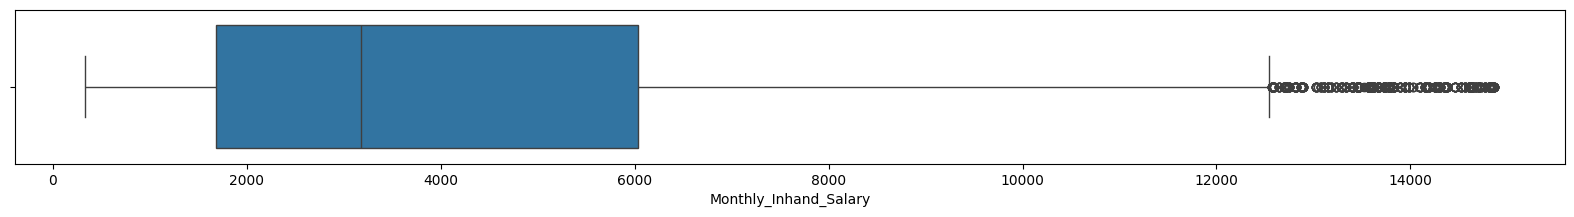

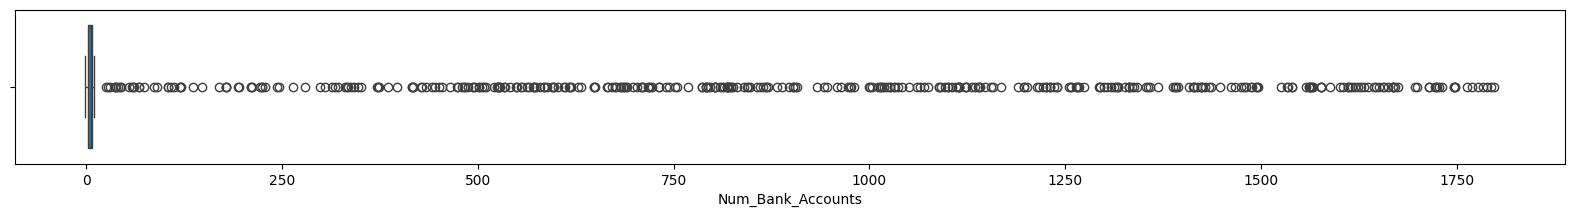

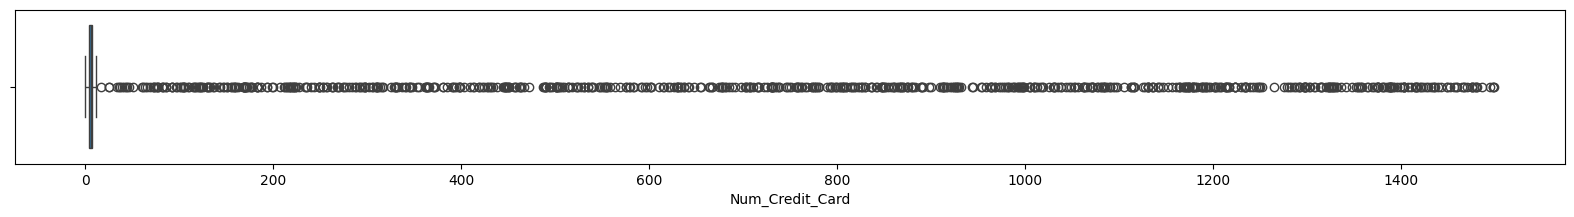

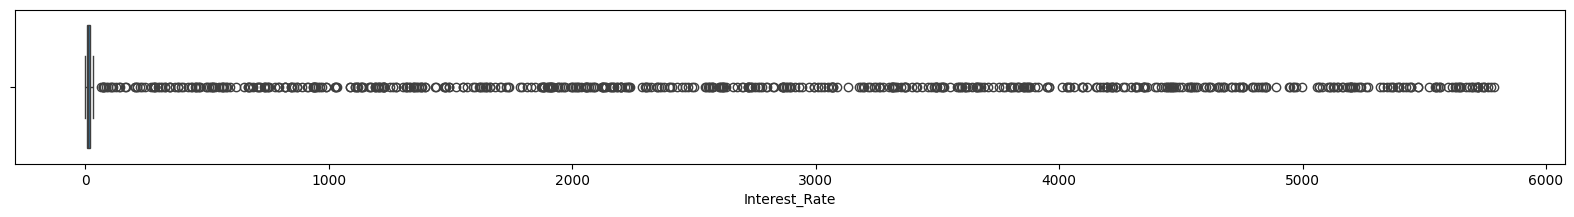

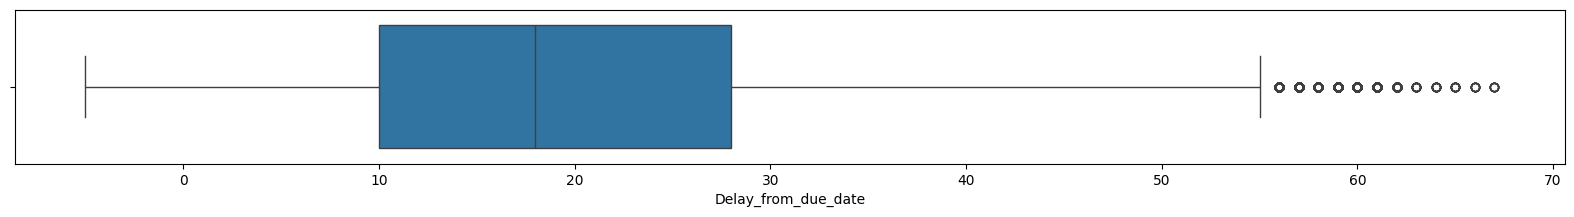

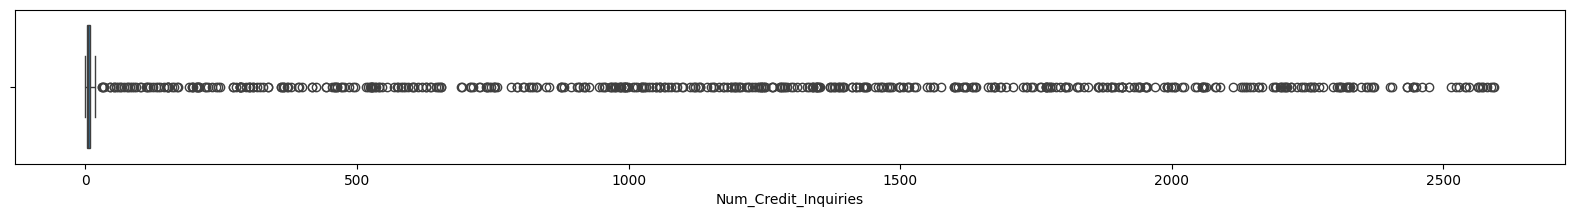

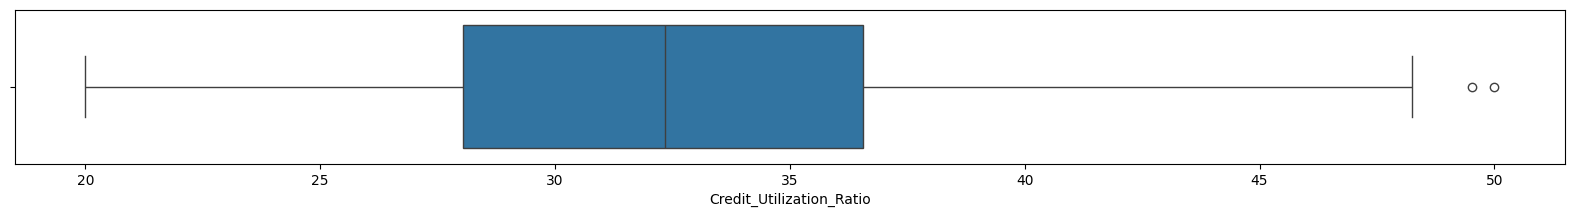

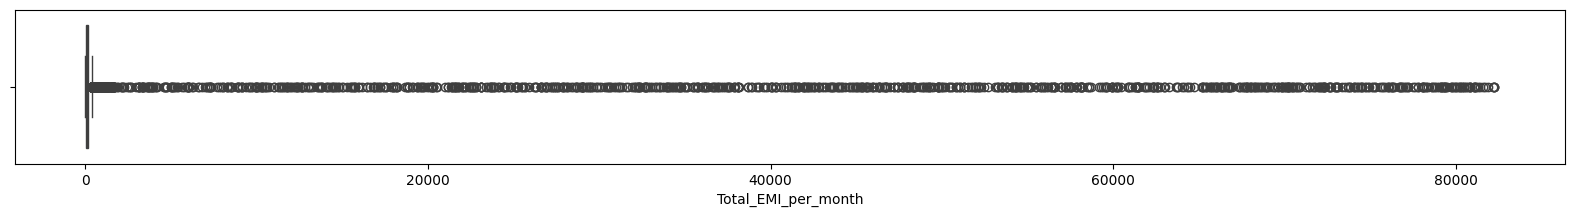

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

#### Outlier Handling dengan Winsorize

In [19]:
from scipy.stats.mstats import winsorize

df[df.select_dtypes(exclude="object").columns] = df.select_dtypes(exclude="object").apply(lambda x: winsorize(x, limits=[0, 0.05]))

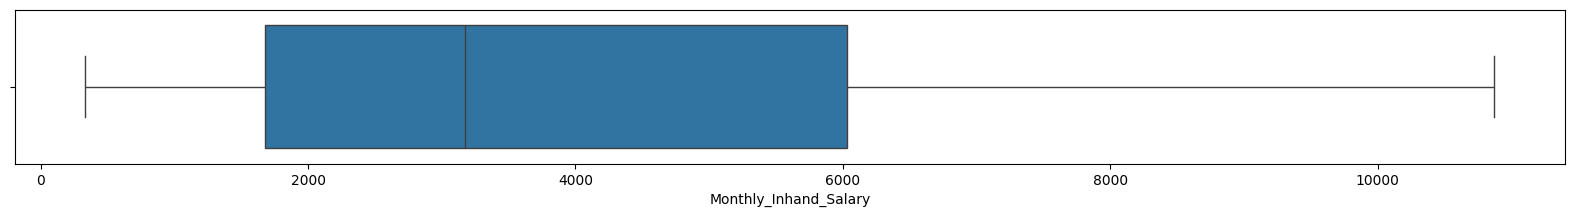

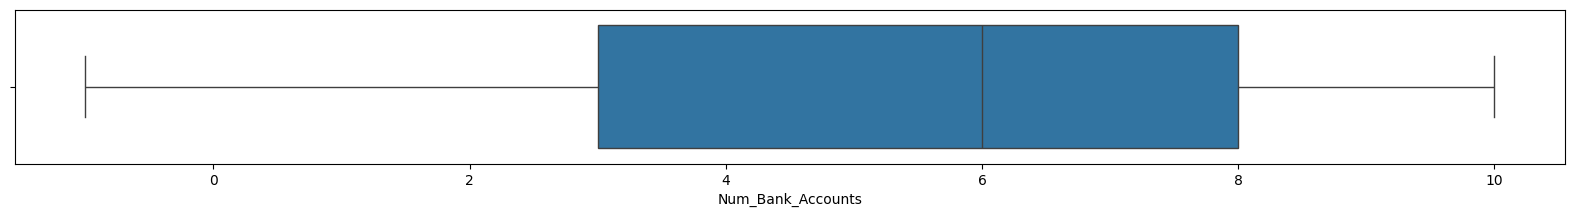

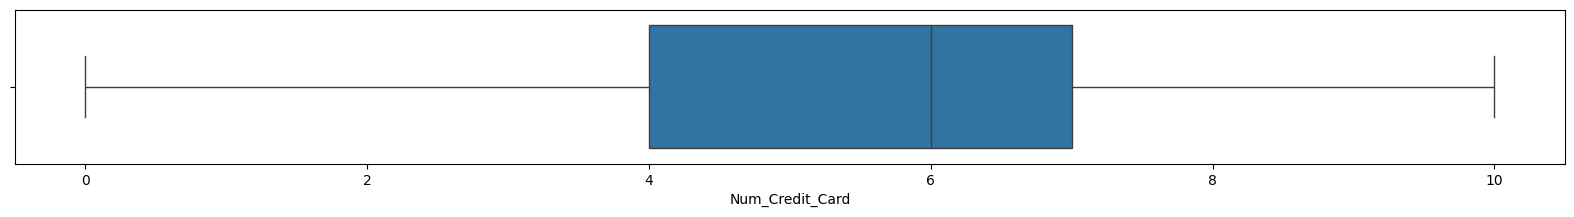

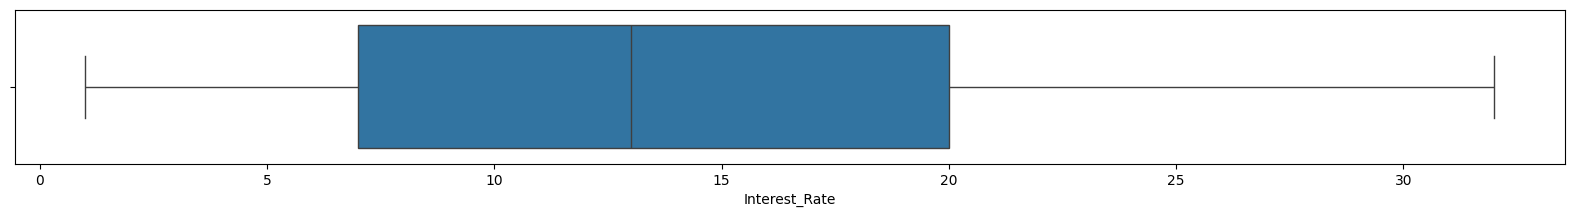

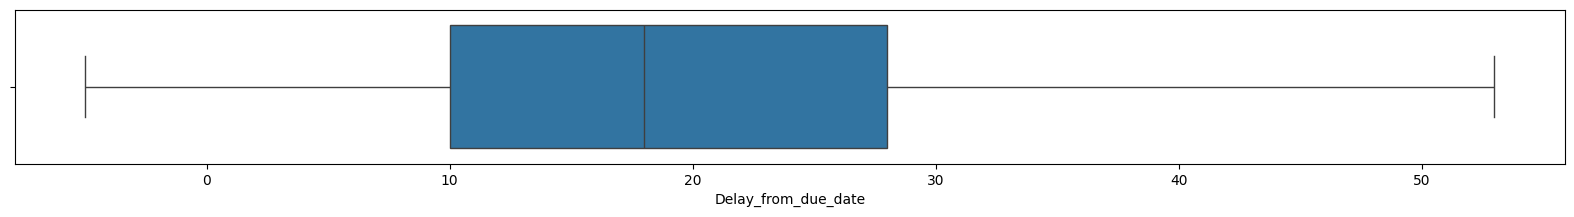

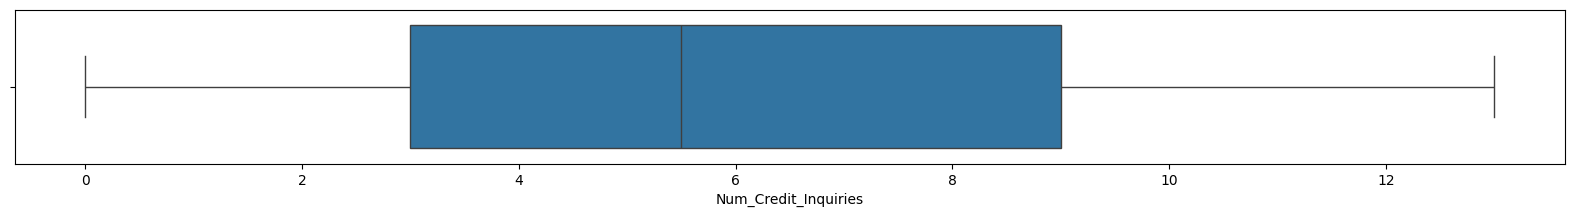

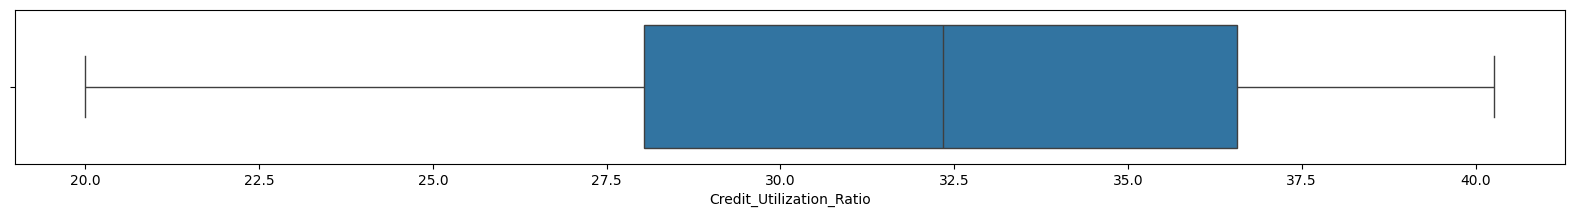

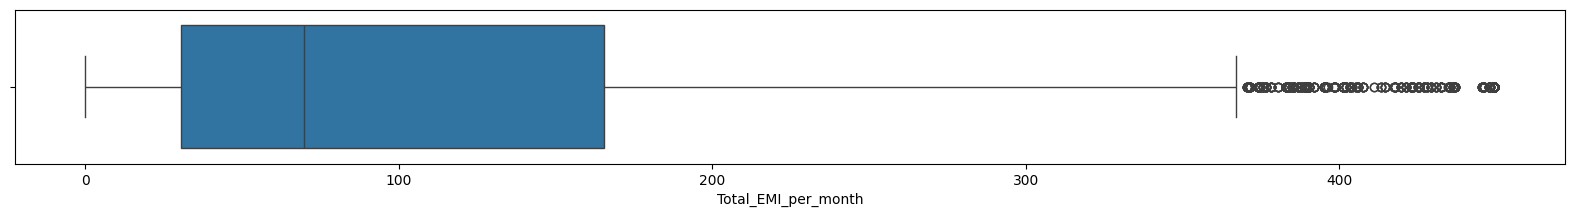

In [20]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [21]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

Monthly_Inhand_Salary       4354.735833
Num_Bank_Accounts              5.000000
Num_Credit_Card                3.000000
Interest_Rate                 13.000000
Delay_from_due_date           18.000000
Num_Credit_Inquiries           6.000000
Credit_Utilization_Ratio       8.525946
Total_EMI_per_month          135.039376
dtype: float64

In [22]:
count_outlier = (df.select_dtypes(exclude="object") > (q3 + 1.5 * iqr)).sum()
count_outlier

Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month         1981
dtype: int64

In [23]:
persentase_outliers = count_outlier / df.select_dtypes(exclude="object").shape[0] * 100
print(persentase_outliers)

Monthly_Inhand_Salary       0.000000
Num_Bank_Accounts           0.000000
Num_Credit_Card             0.000000
Interest_Rate               0.000000
Delay_from_due_date         0.000000
Num_Credit_Inquiries        0.000000
Credit_Utilization_Ratio    0.000000
Total_EMI_per_month         6.517519
dtype: float64


### Scaling Data

In [24]:
import pandas as pd
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()

numeric_cols = df.select_dtypes(exclude="object").columns
scaled_data = scaler.fit_transform(df[numeric_cols])

robust_df = pd.DataFrame(scaled_data, columns=numeric_cols)
robust_df = pd.concat([robust_df, df.select_dtypes(include="object").reset_index(drop=True)], axis=1)
robust_df.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,ID,Customer_ID,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.309884,-0.6,-0.666667,-0.769231,-0.833333,-0.25,-0.646589,-0.148312,0x1602,CUS_0xd40,...,7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0.063268,-0.6,-0.666667,-0.769231,-1.055556,-0.25,-0.045795,-0.148312,0x1603,CUS_0xd40,...,1215.09,11.27,Good,809.98,3119.6,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-0.085527,-0.6,-0.666667,-0.769231,-0.833333,-0.25,-0.437025,-0.148312,0x1604,CUS_0xd40,...,7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,-0.028816,-0.6,-0.666667,-0.769231,-0.722222,-0.25,-0.112310,-0.148312,0x1605,CUS_0xd40,...,4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,-0.309884,-0.6,-0.666667,-0.769231,-0.666667,-0.25,-0.884132,-0.148312,0x1606,CUS_0xd40,...,511.29,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [25]:
cv_before_scaling = np.std(df[numeric_cols]) / df[numeric_cols].mean(axis=0)
cv_robust = np.std(robust_df[numeric_cols]) / df[numeric_cols].mean(axis=0)
print('CV Before Scaling:\n', cv_before_scaling)
print('CV After Robust Scaling:\n', cv_robust)

CV Before Scaling:
 Monthly_Inhand_Salary       0.710526
Num_Bank_Accounts           0.493260
Num_Credit_Card             0.379203
Interest_Rate               0.608855
Delay_from_due_date         0.678416
Num_Credit_Inquiries        0.659635
Credit_Utilization_Ratio    0.155526
Total_EMI_per_month         1.039195
dtype: float64
CV After Robust Scaling:
 Monthly_Inhand_Salary       0.000163
Num_Bank_Accounts           0.098652
Num_Credit_Card             0.126401
Interest_Rate               0.046835
Delay_from_due_date         0.037690
Num_Credit_Inquiries        0.109939
Credit_Utilization_Ratio    0.018242
Total_EMI_per_month         0.007695
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Encoding 

In [26]:
cat_col = ['Age','Monthly_Balance', 'Payment_Behaviour', 'Amount_invested_monthly', 
           'Credit_History_Age','Num_of_Delayed_Payment', 'Type_of_Loan',
           'Outstanding_Debt', 'Credit_Score', 'Payment_of_Min_Amount', 'Credit_Mix'
          ]

In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [28]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,111,821-00-0265,Scientist,19114.12,1824.843333,3,...,3,3710,26.822620,999,2,49.574949,25913,4,12882,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,111,821-00-0265,Scientist,19114.12,3449.821667,3,...,1,3710,31.944960,1405,2,49.574949,2448,5,9548,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,0,821-00-0265,Scientist,19114.12,2801.861250,3,...,1,3710,28.609352,1003,2,49.574949,26106,6,14816,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,111,821-00-0265,Scientist,19114.12,3048.820833,3,...,1,3710,31.377862,1004,2,49.574949,9644,7,3613,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,111,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,3710,24.797347,1005,2,49.574949,17643,3,15789,0


## Modeling & Evaluation

Dalam proses ini akan dilakukan modeling dengan menggunakan Random Forest Classification, Gradient Boosting, dan Decission Tree. Model dengan akurasi terbaik akan diambil dan dilanjutkan ke tahap deployment menggunakan streamlit

In [29]:
df.select_dtypes(exclude='object').columns

Index(['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [30]:
X = df[['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']]

y = df['Credit_Score']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')
Index(['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix 
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

rf_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, rf_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.70      0.75      1094
           1       0.77      0.81      0.79      1742
           2       0.80      0.81      0.81      3243

    accuracy                           0.79      6079
   macro avg       0.79      0.77      0.78      6079
weighted avg       0.79      0.79      0.79      6079



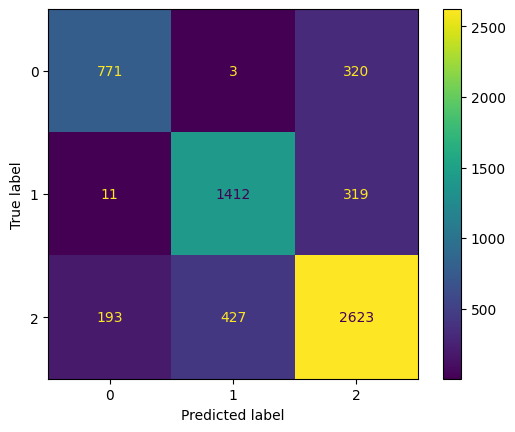

In [35]:
CM_RF = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(CM_RF).plot()

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model_dectree = DecisionTreeClassifier(random_state=40)

In [37]:
model_dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [38]:
y_pred_dectree = model_dectree.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred_dectree)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_dectree))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1094
           1       0.68      0.70      0.69      1742
           2       0.74      0.73      0.73      3243

    accuracy                           0.71      6079
   macro avg       0.69      0.69      0.69      6079
weighted avg       0.71      0.71      0.71      6079



### Gradient Boosting Classifier

In [40]:
model_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=40)

In [41]:
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=40)

In [42]:
y_pred_GBC = model_GBC.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred_GBC)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_GBC))

Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.65      0.49      0.56      1094
           1       0.71      0.62      0.66      1742
           2       0.69      0.79      0.74      3243

    accuracy                           0.69      6079
   macro avg       0.68      0.64      0.65      6079
weighted avg       0.69      0.69      0.68      6079



### Import Model

Proses ini akan melakukan import pada model dengan accuracy yang paling baik. Pada proses ini didapatkan model dengan Random Forest memiliki tingkat akurasi yang cukup baik untuk data finance ini.

In [45]:
import joblib

In [46]:
joblib.dump(model, 'model_finance_RandomForest.pkl')

['model_finance_RandomForest.pkl']

## Deployment Documentation

Dalam proses deployment ini menggunakan model_finance_RandomForest.pkl dengan bantuan Streamlit.

Berikut list syntax yang digunakan dalam proses deployment

In [ ]:
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('model_finance_RandomForest.pkl')

st.title("Credit Score Classifier")

st.header("Input Features")

age = st.number_input("Age", min_value=0, max_value=100, value=30)
monthly_salary = st.number_input("Monthly In-hand Salary", min_value=0, value=5000)
num_bank_accounts = st.number_input("Number of Bank Accounts", min_value=0, value=1)
num_credit_cards = st.number_input("Number of Credit Cards", min_value=0, value=1)
interest_rate = st.number_input("Interest Rate (%)", min_value=0.0, value=5.0)
delay_from_due_date = st.number_input("Delay from Due Date (days)", min_value=0, value=0)
num_delayed_payments = st.number_input("Number of Delayed Payments", min_value=0, value=0)
num_credit_inquiries = st.number_input("Number of Credit Inquiries", min_value=0, value=0)
outstanding_debt = st.number_input("Outstanding Debt", min_value=0, value=0)
credit_utilization_ratio = st.number_input("Credit Utilization Ratio (%)", min_value=0.0, value=30.0)
credit_history_age = st.number_input("Credit History Age (years)", min_value=0, value=1)
total_emi_per_month = st.number_input("Total EMI per Month", min_value=0, value=0)
amount_invested_monthly = st.number_input("Amount Invested Monthly", min_value=0, value=0)
monthly_balance = st.number_input("Monthly Balance", min_value=0, value=0)

# Create a DataFrame from the input
input_data = pd.DataFrame({
    'Age': [age],
    'Monthly_Inhand_Salary': [monthly_salary],
    'Num_Bank_Accounts': [num_bank_accounts],
    'Num_Credit_Card': [num_credit_cards],
    'Interest_Rate': [interest_rate],
    'Delay_from_due_date': [delay_from_due_date],
    'Num_of_Delayed_Payment': [num_delayed_payments],
    'Num_Credit_Inquiries': [num_credit_inquiries],
    'Outstanding_Debt': [outstanding_debt],
    'Credit_Utilization_Ratio': [credit_utilization_ratio],
    'Credit_History_Age': [credit_history_age],
    'Total_EMI_per_month': [total_emi_per_month],
    'Amount_invested_monthly': [amount_invested_monthly],
    'Monthly_Balance': [monthly_balance]
})

# Predict the credit score bracket
if st.button("Predict Credit Score"):
    prediction = model.predict(input_data)
    score_bracket = ["Poor", "Standard", "Good"]
    st.success(f"The predicted credit score bracket is: {score_bracket[prediction[0]]}")

Model yang telah dibuat masih menggunakan currency USD menyesuaikan default dari value yang tersedia dalam dataset. Pengembangan model ini juga masih diperlukan untuk memaksimalkan dan menyempurnakan penggunaannya agar lebih leluasa dengan mempertimbangkan currency converter.

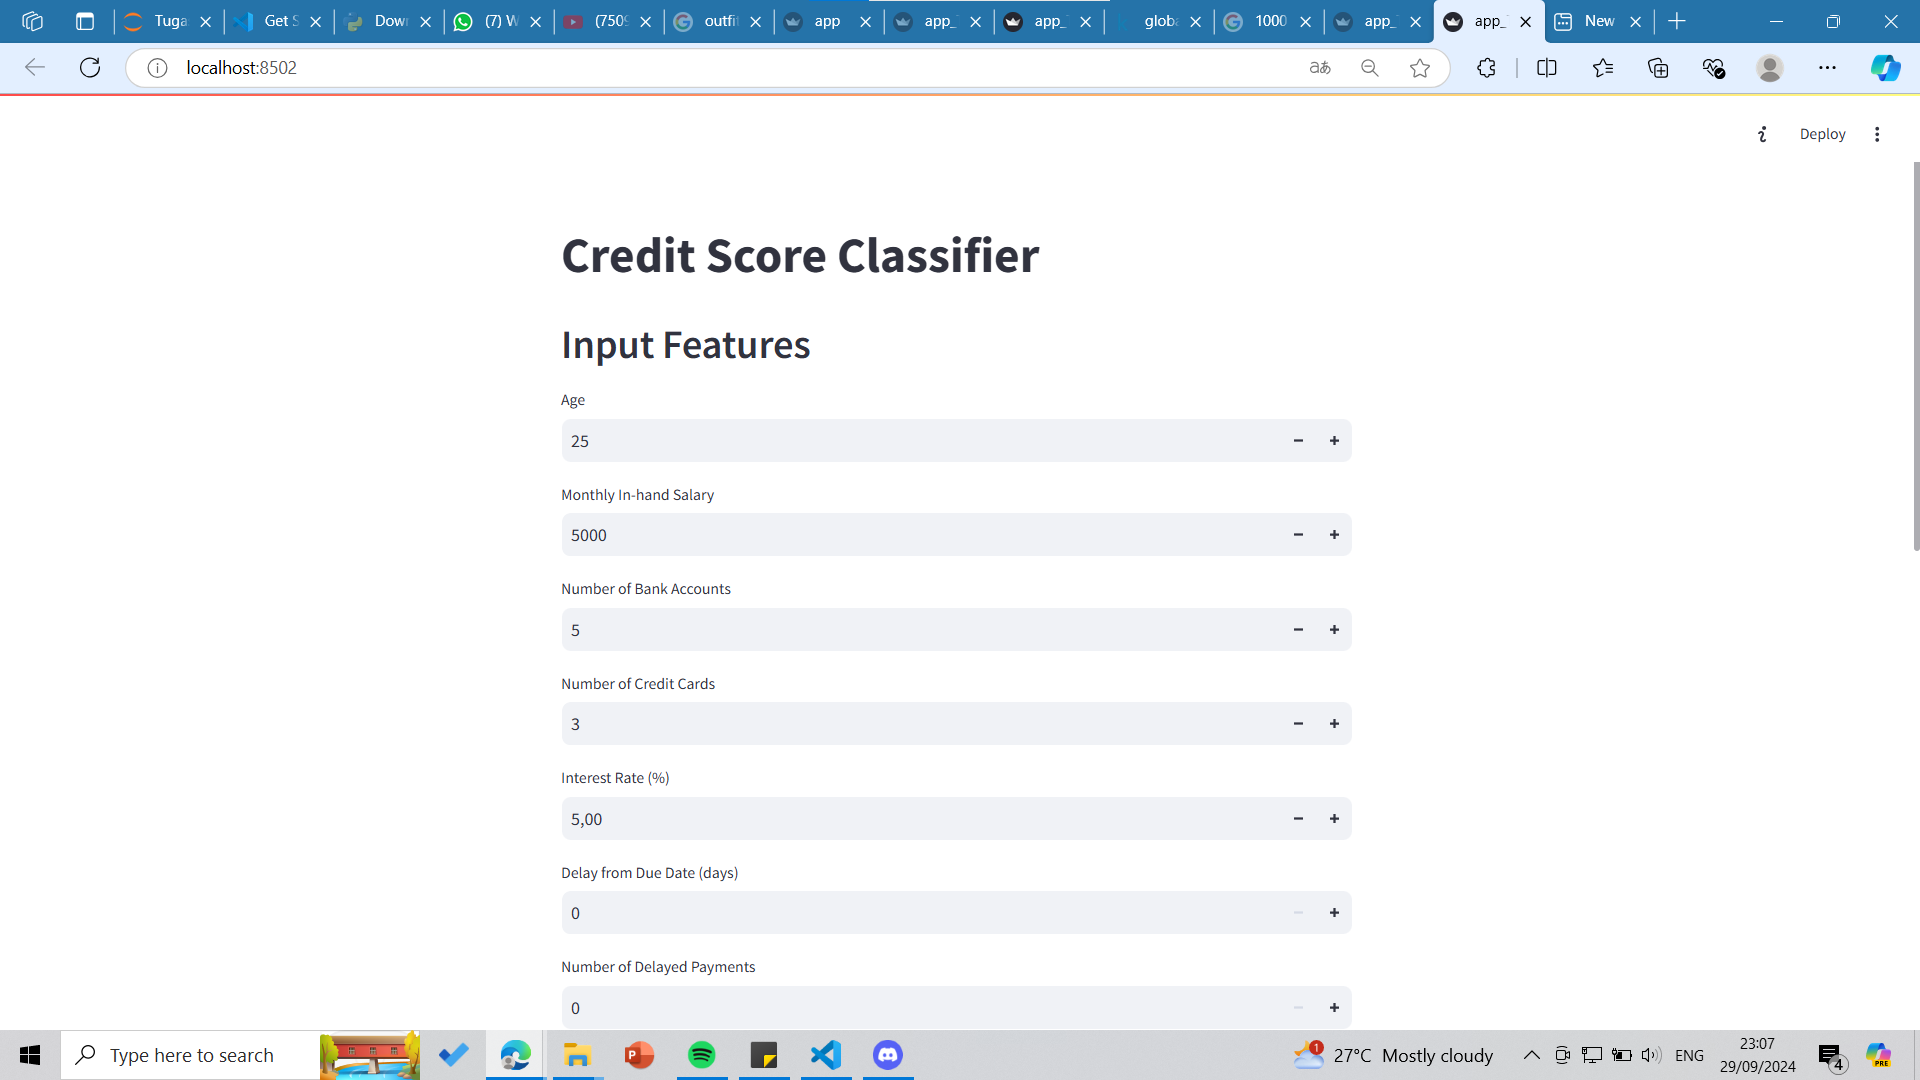

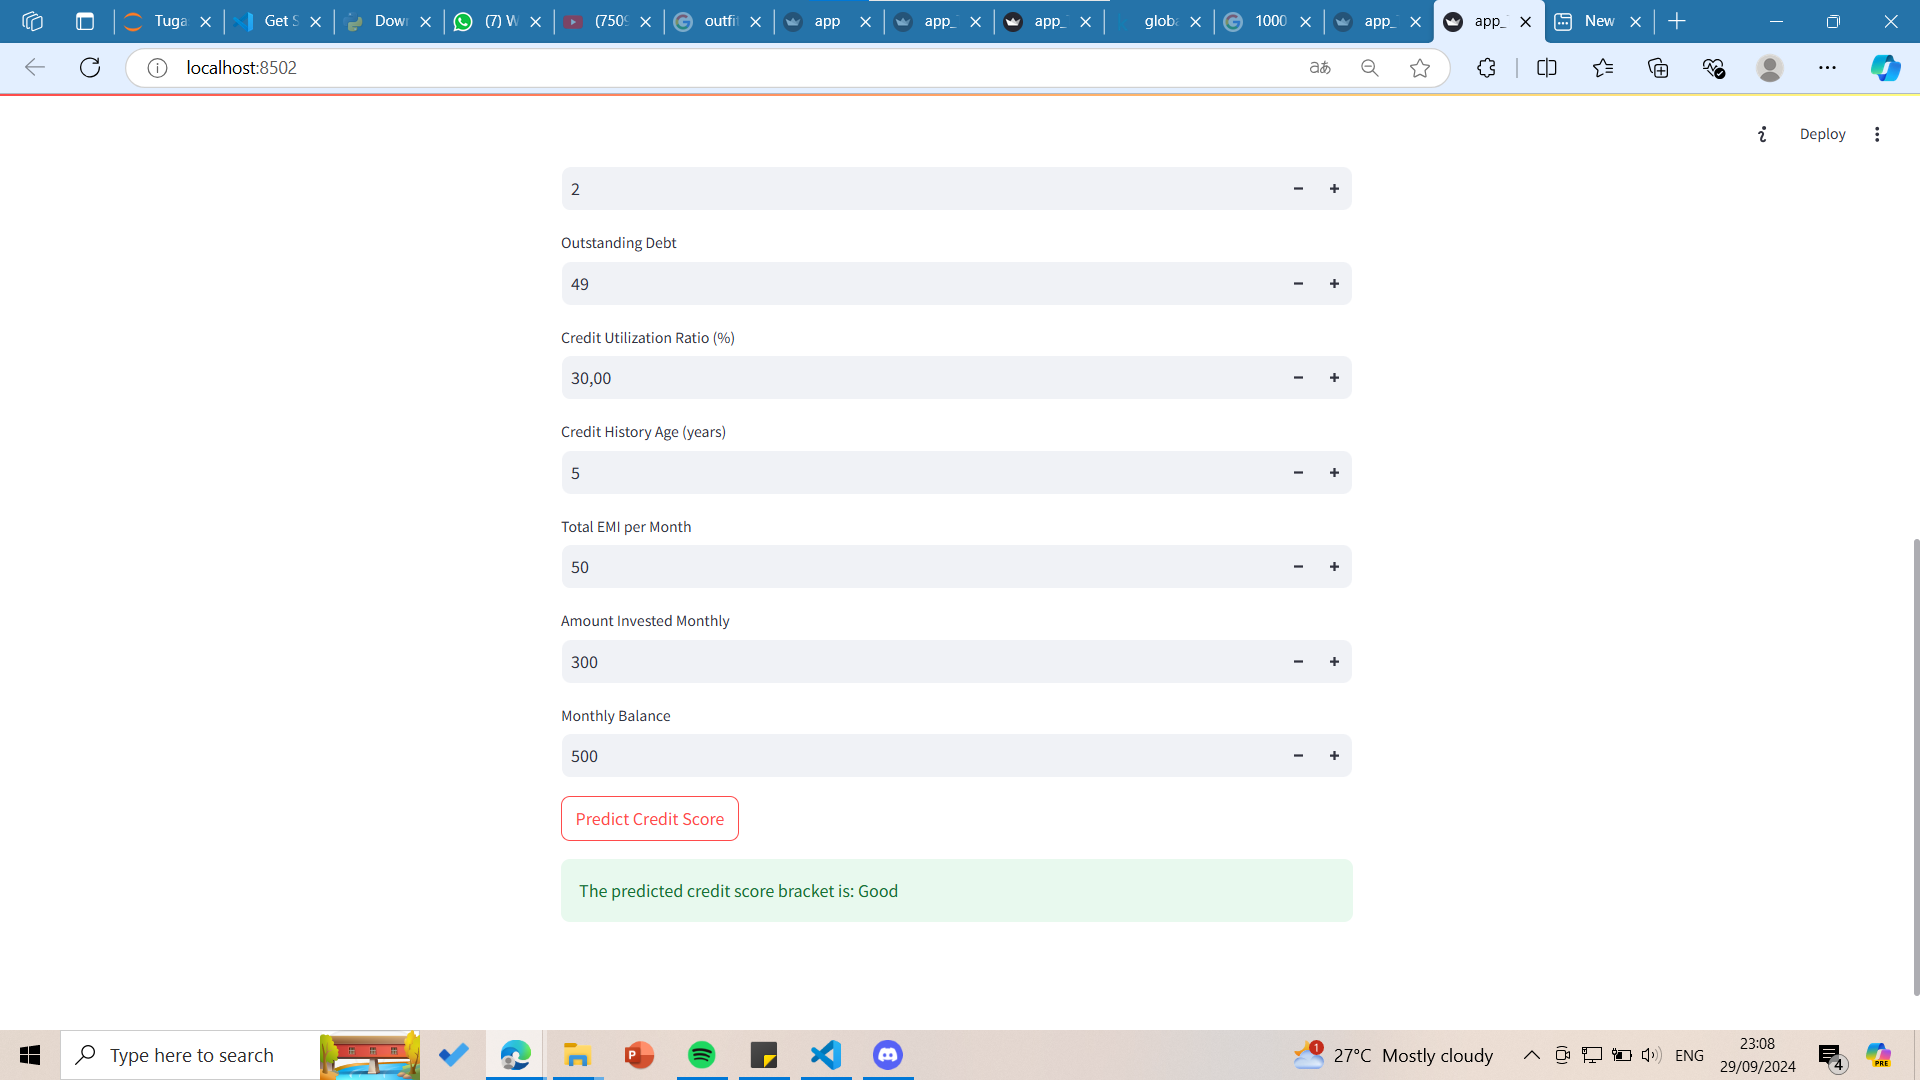